In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import brickschema
import datetime
from relaxation_graphs.fast_relaxation_graph import *
from evaluation.similarity_score import *
import uuid
import pickle
from rdflib import URIRef, Literal, BNode
from queries.mortar import queries as q1
%matplotlib inline

In [2]:
font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 32}

matplotlib.rc('font', **font)

In [27]:
with open("metrics.json") as fp:
    metrics = json.load(fp)

with open("metrics_all_buildings.json") as fp:
    metrics = json.load(fp)
    
sim_df = pd.read_csv('similarity_metrics.csv')

    
useful_queries = [4, 8, 9, 10, 11, 12, 15]
useful_buildings = range(6)

files = os.listdir('Data - Brick models/')
brick_models = []

with open("brick_models.pkl", 'rb') as fp:
    brick_models = pickle.load(fp)
    

In [4]:
relaxation_time = {}
for q in metrics:
    size = metrics[q]['query_size']
    if size in relaxation_time:
        relaxation_time[size].append(metrics[q]['relaxation_time'])
    else:
        relaxation_time[size] = [metrics[q]['relaxation_time']]

x = []
y = []
for size in relaxation_time:
    print(size, sum(relaxation_time[size])/len(relaxation_time[size]))
    x.append(size)
    y.append(sum(relaxation_time[size])/len(relaxation_time[size])*1000)

1 0.0003065
2 0.000598
12 0.006944
4 0.001054
9 0.001823
3 0.001252
7 0.0012726666666666667


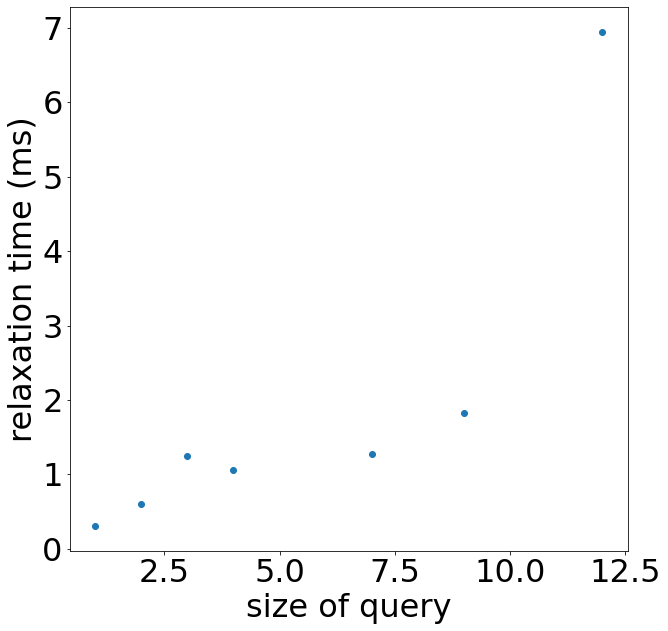

In [5]:
plt.Figure()
plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(x, y)
plt.xlabel('size of query')
plt.ylabel('relaxation time (ms)')
plt.savefig('results/relaxation_time.pdf')

In [6]:
x = []
y1 = []
y2 = []
for q_idx, q in enumerate(metrics):
    for level in metrics.get(q).get('level_building_num_nodes_with_data'):
        building_node_num_map = metrics.get(q).get('level_building_num_nodes_with_data').get(level)
        unique_buildings = []
        for building in building_node_num_map:
            if building_node_num_map[building] > 0:
                if building not in unique_buildings:
                    unique_buildings.append(building)
        # print(q_idx, level, len(unique_buildings))
        x.append(level)
        y1.append(len(unique_buildings))
        y2.append(q_idx)

In [7]:
df = pd.DataFrame(data={'level': x, 'unique_buildings': y1, 'q':y2})
df.level = df.level.astype(int)
df.q = df.q.astype(int)
df

,level,unique_buildings,q
0,0,50,0
1,1,50,0
2,2,50,0
3,3,0,0
4,4,0,0
...,...,...,...
97,1,0,16
98,2,0,16
99,3,0,16
100,4,0,16


In [8]:
df_level0 = df.loc[df.level==0]
df_level1 = df.loc[df.level==1]

In [9]:
df.to_csv("results/level_query_buildings.csv")

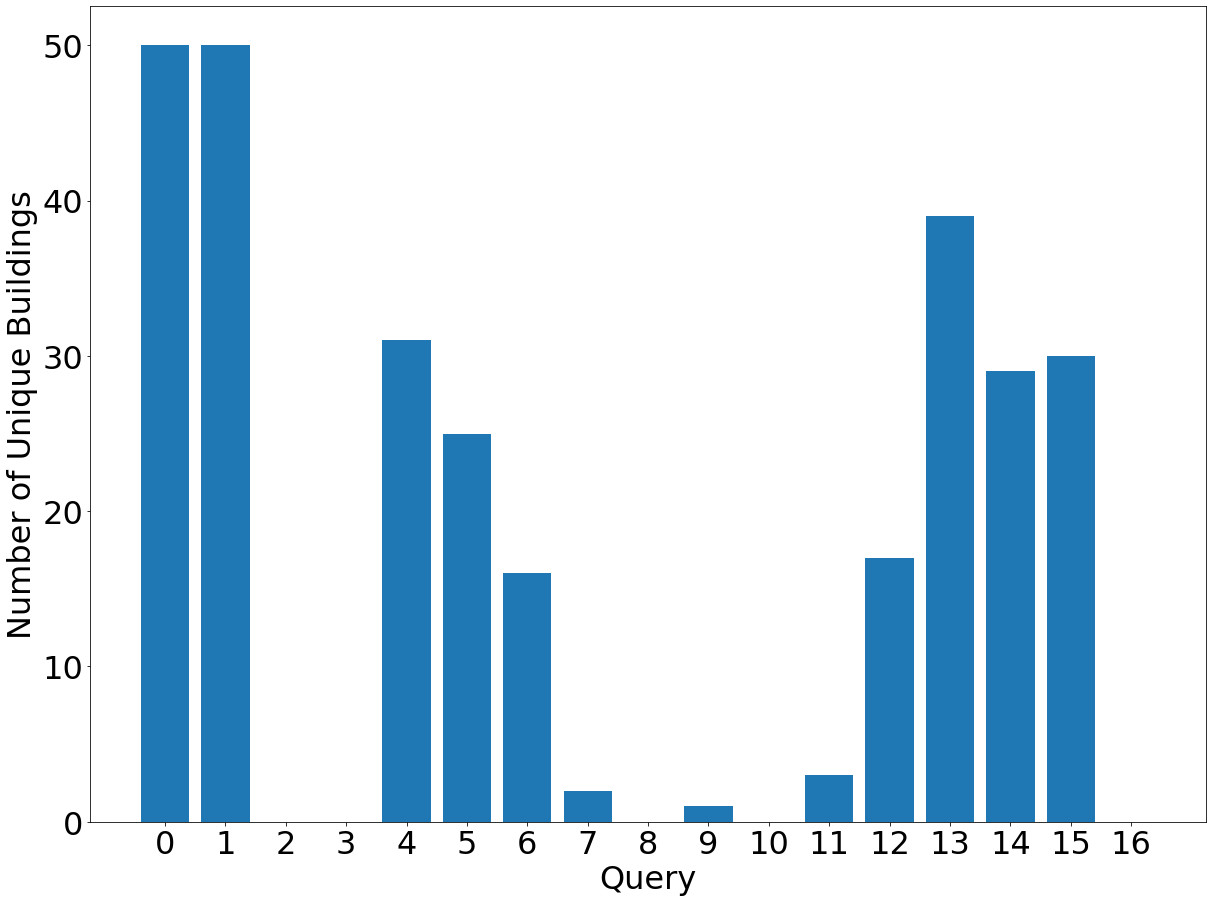

In [10]:
plt.Figure()
plt.rcParams['figure.figsize'] = [20, 15]
plt.bar(x=[str(q) for q in df_level0.q], height=df_level0.unique_buildings)
plt.xlabel("Query")
plt.ylabel("Number of Unique Buildings")
plt.savefig('results/level0_qualified.pdf')

In [11]:
# plt.Figure(figsize=(20,10))
# plt.bar(x=[str(q) for q in df_level1.q], height=df_level1.unique_buildings)
# plt.xlabel("Query")
# plt.ylabel("Number of Unique Buildings at Level 1")

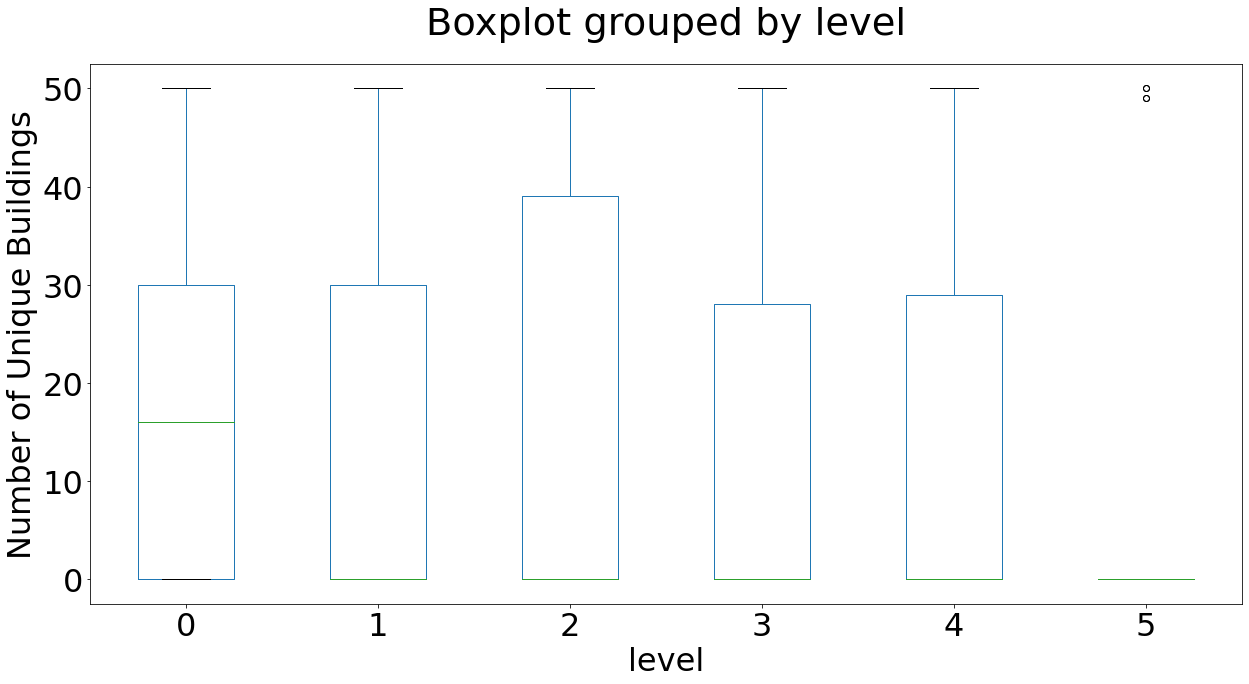

In [12]:
plt.Figure()
plt.rcParams['figure.figsize'] = [20, 10]
df.boxplot(column='unique_buildings', by='level')
plt.grid(b=None)
plt.title(None)
plt.ylabel("Number of Unique Buildings")
plt.savefig('results/unique_building_hist.pdf')

In [13]:
# for q in metrics:
#     print('# relaxed queries: {}'.format(metrics.get(q).get('size_relaxed_graph')))
#     print('max edits: {}'.format(metrics.get(q).get('max_edits')))
#     num_nodes_with_data = {}

#     for level in metrics.get(q).get('level_building_num_nodes_with_data'):
#         building_node_num_map = metrics.get(q).get('level_building_num_nodes_with_data').get(level)
#         for building_id in building_node_num_map:
#             if building_id not in num_nodes_with_data:
#                 num_nodes_with_data[building_id] = building_node_num_map[building_id]
#             else:
#                 num_nodes_with_data[building_id] += building_node_num_map[building_id]

#     print("# relaxed queries with data: {}".format(num_nodes_with_data))
#     print()

In [ ]:
# query_id, level0, level1, level2, level3, level4

In [19]:
latex_ops = {}
for q_idx in useful_queries:
    q = q1[q_idx]
    data = metrics.get(q)
    level_dict = data.get('level_building_num_nodes_with_data')
    for building_idx in useful_buildings:
        latex_op = "Q{} ".format(q_idx)
        for level in level_dict:
            num_nodes = level_dict.get(level).get(str(building_idx))
            latex_op += "& {} ".format(num_nodes)
        
        if building_idx not in latex_ops:
            latex_ops[building_idx] = latex_op +"\\\ \n"
        else:
            latex_ops[building_idx] += latex_op+" \\\ \n"
        
#     for level in metrics.get(q).get('level_building_num_nodes_with_data'):
#         building_node_num_map = metrics.get(q).get('level_building_num_nodes_with_data').get(level)
#         for building_id in building_node_num_map:
#             if building_id not in num_nodes_with_data:
#                 num_nodes_with_data[building_id] = building_node_num_map[building_id]
#             else:
#                 num_nodes_with_data[building_id] += building_node_num_map[building_id]


In [20]:
building_table = 1
header = "Query "
for level in level_dict:
    header+= "& L{}".format(level)
header+="\\\ \midrule \n"
print(header+latex_ops[building_table][:-1]+"\\bottomrule \n")

Query & L0& L1& L2& L3& L4& L5\\ \midrule 
Q4 & 2 & 2 & 2 & 2 & 2 & 2 \\ 
Q8 & 0 & 0 & 0 & 0 & 0 & 0  \\ 
Q9 & 0 & 0 & 1 & 4 & 8 & 11  \\ 
Q10 & 0 & 0 & 0 & 0 & 0 & 0  \\ 
Q11 & 0 & 0 & 0 & 0 & 0 & 0  \\ 
Q12 & 2 & 3 & 5 & 7 & 9 & 10  \\ 
Q15 & 2 & 1 & 1 & 1 & 1 & 0  \\ \bottomrule 



## getting metrics for failed query

In [21]:
failing_query = q1[useful_queries[4]]

In [22]:
print(failing_query)

SELECT * WHERE {
    ?equip        rdf:type   brick:VAV .
    ?equip        brick:isFedBy+                 ?ahu .
    ?vlv          rdf:type                    brick:Valve .
    ?ahu          brick:hasPoint                 ?upstream_ta .
    ?equip        brick:hasPoint                 ?dnstream_ta .
    ?upstream_ta  rdf:type   brick:Supply_Air_Temperature_Sensor .
    ?dnstream_ta  rdf:type   brick:Supply_Air_Temperature_Sensor .
    ?equip        brick:hasPoint                 ?vlv .
    ?vlv          rdf:type   brick:Valve_Command
}


In [36]:
max_level = 5
query_metrics = {}
start_time = datetime.datetime.now()
G = get_fast_relaxed_graph(query=failing_query, max_level=max_level)
end_time = datetime.datetime.now()
query_metrics[failing_query]={'graph': G}
query_metrics[failing_query]['relaxation_time']  = (end_time-start_time).total_seconds()
query_metrics[failing_query]['query_size'] = len(extract_triples(failing_query))

In [ ]:

buildings = brick_models
# for query in q1[:-1]:
relaxed_graph = query_metrics[failing_query]['graph']
select_statement = failing_query.split("{")[0] + "{\n"

level_building_nodes = {}
max_edits = -1
for level in range(max_level+1):

    building_nodes_with_data = {}
    for building_idx in range(len(buildings)):
        building_model = buildings[building_idx]
        nodes_with_data= []

        for node_idx, node in relaxed_graph.nodes().data():
            if node['level'] == level:

                if max_edits == -1:
                    max_edits = level
                elif level>max_edits:
                    max_edits = level

                brick_query = generate_brick_query_from_node(node['query'], select_statement=select_statement)
                res = run_brick_query(building_model=building_model, query=brick_query)

                if len(res) > 0:
                    nodes_with_data.append(node)
        building_nodes_with_data[building_idx] = len(nodes_with_data)
    level_building_nodes[level] = building_nodes_with_data
    print("level {} done".format(level))
query_metrics[failing_query]['level_building_num_nodes_with_data'] = level_building_nodes
query_metrics[failing_query]['size_relaxed_graph'] = len(relaxed_graph.nodes())
query_metrics[failing_query]['max_edits'] = max_edits
query_metrics[failing_query] = {
    'level_building_num_nodes_with_data': level_building_nodes,
    'size_relaxed_graph': len(relaxed_graph.nodes()),
    'max_edits': max_edits,
    'query_size': query_metrics[failing_query]['query_size'],
    'relaxation_time': query_metrics[failing_query]['relaxation_time']
}
print(query_metrics[failing_query])
#     with open("metrics_all_buildings.json", 'w') as fp:
#         json.dump(metrics, fp)

level 0 done
level 1 done
level 2 done
level 3 done
level 4 done


In [ ]:
## next steps: remove metrics[list(metrics.keys())[11]] 
## add metrics[q1[11]] = query_metrics[failing_query]
## write metrics to json

In [30]:
list(metrics.keys())

['SELECT * WHERE { ?s ?p ?o }',
 'SELECT ?point ?point_type WHERE {\n    ?point rdf:type brick:Point .\n    ?point rdf:type ?point_type \n}',
 'SELECT ?meter WHERE { ?meter rdf:type brick:Green_Button_Meter }',
 ' SELECT ?t WHERE { ?t rdf:type brick:Weather_Temperature_Sensor }',
 'SELECT ?sensor WHERE {\n    ?sensor rdf:type brick:Zone_Air_Temperature_Sensor .\n    ?sensor brick:isPointOf ?equip \n}',
 'SELECT ?sp WHERE {\n    ?sp rdf:type brick:Zone_Air_Temperature_Setpoint .\n    ?sp brick:isPointOf ?equip\n}',
 'SELECT ?meter WHERE { ?meter rdf:type brick:Building_Electric_Meter }',
 'SELECT ?point WHERE { ?point rdf:type brick:Occupancy_Sensor }',
 'SELECT ?tstat ?room ?zone ?state ?temp ?hsp ?csp WHERE {\n            ?tstat brick:hasLocation ?room .\n            ?zone brick:hasPart ?room .\n            ?tstat brick:hasPoint ?state .\n            ?tstat brick:hasPoint ?temp .\n            ?tstat brick:hasPoint ?hsp .\n            ?tstat brick:hasPoint ?csp .\n            ?zone rdf

In [32]:
metrics[ 'SELECT * WHERE {\n        ?vlv        rdf:type   brick:Valve_Command .\n        ?vlv        rdf:type                    ?vlv_type .\n        ?equip      brick:hasPoint                 ?vlv .\n        ?equip      rdf:type   brick:Air_Handling_Unit .\n        ?air_temps  rdf:type   brick:Supply_Air_Temperature_Sensor .\n        ?equip      brick:hasPoint                 ?air_temps .\n        ?air_temps  rdf:type                    ?temp_type\n    }']

{'level_building_num_nodes_with_data': {'0': {'0': 1,
   '1': 1,
   '2': 0,
   '3': 1,
   '4': 1,
   '5': 1,
   '6': 1,
   '7': 1,
   '8': 0,
   '9': 1,
   '10': 0,
   '11': 0,
   '12': 1,
   '13': 1,
   '14': 1,
   '15': 1,
   '16': 1,
   '17': 1,
   '18': 1,
   '19': 0,
   '20': 1,
   '21': 1,
   '22': 1,
   '23': 1,
   '24': 0,
   '25': 1,
   '26': 0,
   '27': 1,
   '28': 1,
   '29': 1,
   '30': 1,
   '31': 1,
   '32': 1,
   '33': 0,
   '34': 1,
   '35': 1,
   '36': 1,
   '37': 1,
   '38': 1,
   '39': 1,
   '40': 0,
   '41': 1,
   '42': 1,
   '43': 0,
   '44': 1,
   '45': 0,
   '46': 1,
   '47': 1,
   '48': 1,
   '49': 1},
  '1': {'0': 0,
   '1': 0,
   '2': 0,
   '3': 0,
   '4': 0,
   '5': 0,
   '6': 0,
   '7': 0,
   '8': 0,
   '9': 0,
   '10': 0,
   '11': 0,
   '12': 0,
   '13': 0,
   '14': 0,
   '15': 0,
   '16': 0,
   '17': 0,
   '18': 0,
   '19': 0,
   '20': 0,
   '21': 0,
   '22': 0,
   '23': 0,
   '24': 0,
   '25': 0,
   '26': 0,
   '27': 0,
   '28': 0,
   '29': 0,
   '30': 0,

In [33]:
query_metrics['SELECT * WHERE {\n    ?equip        rdf:type   brick:VAV .\n    ?equip        brick:isFedBy+                 ?ahu .\n    ?vlv          rdf:type                    brick:Valve .\n    ?ahu          brick:hasPoint                 ?upstream_ta .\n    ?equip        brick:hasPoint                 ?dnstream_ta .\n    ?upstream_ta  rdf:type   brick:Supply_Air_Temperature_Sensor .\n    ?dnstream_ta  rdf:type   brick:Supply_Air_Temperature_Sensor .\n    ?equip        brick:hasPoint                 ?vlv .\n    ?vlv          rdf:type   brick:Valve_Command\n}']

{'graph': <networkx.classes.graph.Graph at 0x7fb299281940>,
 'relaxation_time': 0.547987,
 'query_size': 9,
 'level_building_num_nodes_with_data': {0: {0: 0,
   1: 0,
   2: 0,
   3: 0,
   4: 0,
   5: 0},
  1: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0},
  2: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0},
  3: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0},
  4: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0},
  5: {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0}},
 'size_relaxed_graph': 3466,
 'max_edits': 5}

In [28]:
max_level = 5
print("\\toprule")
print("Query & Percentage of buildings that qualified before relaxation & Percentage of buildings that qualified after relaxation & Average number of edits to qualify \\\ \midrule")
# % of buildings that qualify during relaxation
for q_idx in range(len(useful_queries)):
    query = q1[useful_queries[q_idx]]
    qualified_building_list = []
    count = 0
    found = False
    building_first_level_qualified = {}
    for level in range(0, max_level+1):
        for building in metrics.get(query).get('level_building_num_nodes_with_data').get(str(level)):
            num_nodes_not_null_results = metrics.get(query).get('level_building_num_nodes_with_data').get(str(level)).get(building)
            if num_nodes_not_null_results != 0:
                found = True
                if level == 0:
                    count+=1
                else:
                    if building not in qualified_building_list:
                        qualified_building_list.append(building)
                if building not in building_first_level_qualified:
                    building_first_level_qualified[building] = level
                    
    if not found:
        print("Q{0} & {1}% & {2}% & {3} \\\ ".format(q_idx, count/50*100, len(qualified_building_list)/50*100, "N/A"))
    else:
        print("Q{0} & {1}% & {2}% & {3} \\\ ".format(q_idx, count/50*100, len(qualified_building_list)/50*100, sum(building_first_level_qualified.values())/50))
print("\\bottomrule")

\toprule
Query & Percentage of buildings that qualified before relaxation & Percentage of buildings that qualified after relaxation & Average number of edits to qualify \\ \midrule
Q0 & 62.0% & 100.0% & 0.52 \\ 
Q1 & 0.0% & 0.0% & N/A \\ 
Q2 & 2.0% & 98.0% & 3.36 \\ 
Q3 & 0.0% & 0.0% & N/A \\ 
Q4 & 6.0% & 0.0% & 0.0 \\ 
Q5 & 34.0% & 98.0% & 2.7 \\ 
Q6 & 60.0% & 100.0% & 0.8 \\ 
\bottomrule


In [281]:
sim_metrics = pd.read_csv('similarity_metrics.csv')
q1 = """SELECT * WHERE {
 ?sen   rdf:type   brick:Supply_Air_Temperature_Sensor .
 ?sp    rdf:type   brick:Supply_Air_Temperature_Setpoint .
 ?ahu   rdf:type   brick:AHU .
 ?ahu   brick:feeds ?thing .
 ?thing  brick:hasPoint ?sen .
 ?thing  brick:hasPoint ?sp 
}"""

file="Data - Brick models/acad.ttl"

g = brickschema.Graph(load_brick=True)
g.load_file(file)
g.expand(profile="owlrl")
select_statement = query.split("{")[0] + "{\n"

In [ ]:
max_level=5

In [325]:
relaxation_start_time = datetime.datetime.now()
print(relaxation_start_time)
G = get_fast_relaxed_graph(query=q1, max_level=5)
relaxation_end_time = datetime.datetime.now()

2021-07-23 08:32:25.028384


In [326]:
print(len(G.nodes()))

1660


In [335]:
total_instances =  get_total_num_instances(g, 'brick:Equipment') + get_total_num_instances(g, 'brick:Location') + get_total_num_instances(g, 'brick:Point')
total_instances

1920

In [340]:
original_uuid = list(G.nodes())[0]
original_query = G.nodes()[original_uuid]['query']

In [354]:
node_id = 0
sim_scores = []
sim_score_dict = {}
sim_score_dict2 = {}
for idx, node in G.nodes().data():
    relaxed_triple = node['query']
    ss = sim_score(original_query, relaxed_triple, g, total_instances)
    sim_scores.append(ss)
    level = node['level']
    levels.append(level)
    sim_score_dict[node_id] = {'node': node, 'sim_score': ss, 'level': level}
    if level > 0:
        if ss in sim_score_dict2:
            sim_score_dict2[ss].append(node)
        else:
            sim_score_dict2[ss] = [node]
    node_id+=1


In [355]:
print(sim_score_dict2.keys())

dict_keys([0, 1, 0.7681412256571158, 0.6617400035965336, 0.8193389185022003, 0.6293680010868559, 0.542189338876426, 0.7816289042500114, 0.6004013845196322, 0.6996116495131994, 0.5374005499410656, 0.8703953925243878, 0.6685865836199897, 0.5759754501794947, 0.71314881958023, 0.5477990083482832, 0.47191910243388513, 0.6803261969230958, 0.5225865987511512, 0.6089387562926757, 0.8691185533597107, 0.6676057908190676, 0.575130514626069, 0.7121026555599422, 0.5469954066355011, 0.6793281825259058, 0.8017951543953568, 0.6158919126231858, 0.6569419746625963, 0.5046242136029326, 0.7385963121445775, 0.5673462764765616, 0.6051607036022517, 0.6559101539170759])


In [369]:
sorted(sim_score_dict2.keys(), reverse=True)

[1,
 0.8703953925243878,
 0.8691185533597107,
 0.8193389185022003,
 0.8017951543953568,
 0.7816289042500114,
 0.7681412256571158,
 0.7385963121445775,
 0.71314881958023,
 0.7121026555599422,
 0.6996116495131994,
 0.6803261969230958,
 0.6793281825259058,
 0.6685865836199897,
 0.6676057908190676,
 0.6617400035965336,
 0.6569419746625963,
 0.6559101539170759,
 0.6293680010868559,
 0.6158919126231858,
 0.6089387562926757,
 0.6051607036022517,
 0.6004013845196322,
 0.5759754501794947,
 0.575130514626069,
 0.5673462764765616,
 0.5477990083482832,
 0.5469954066355011,
 0.542189338876426,
 0.5374005499410656,
 0.5225865987511512,
 0.5046242136029326,
 0.47191910243388513,
 0]

In [373]:
top_nodes = []
limit = 10
for score in sorted(sim_score_dict2.keys(), reverse=True):
    for node in sim_score_dict2[score]:
        if len(top_nodes) <= limit:
            print(node, score)
            top_nodes.append(node)
        else:
            break
            
top_nodes

{'query': (['?sen', 'rdf:type', 'brick:Supply_Air_Temperature_Sensor'], ['?sp', 'rdf:type', 'brick:Supply_Air_Temperature_Setpoint'], ['?ahu', 'rdf:type', 'brick:AHU'], ['?ahu', 'brick:feeds', '?thing'], ['?thing', 'brick:hasPoint', '?sen'], ['?thing', 'brick:hasPoint+', '?sp']), 'node_id': 19, 'level': 1} 1
{'query': (['?sen', 'rdf:type', 'brick:Supply_Air_Temperature_Sensor'], ['?sp', 'rdf:type', 'brick:Supply_Air_Temperature_Setpoint'], ['?ahu', 'rdf:type', 'brick:AHU'], ['?ahu', 'brick:feeds', '?thing'], ['?thing', 'brick:hasPoint+', '?sen'], ['?thing', 'brick:hasPoint', '?sp']), 'node_id': 25, 'level': 1} 1
{'query': (['?sen', 'rdf:type', 'brick:Supply_Air_Temperature_Sensor'], ['?sp', 'rdf:type', 'brick:Supply_Air_Temperature_Setpoint'], ['?ahu', 'rdf:type', 'brick:AHU'], ['?ahu', 'brick:feeds', '?thing'], ['?thing', 'brick:hasPoint+', '?sen'], ['?thing', 'brick:hasPoint+', '?sp']), 'node_id': 27, 'level': 2} 1
{'query': (['?sen', 'rdf:type', 'brick:Supply_Air_Temperature_Sensor'

[{'query': (['?sen', 'rdf:type', 'brick:Supply_Air_Temperature_Sensor'],
   ['?sp', 'rdf:type', 'brick:Supply_Air_Temperature_Setpoint'],
   ['?ahu', 'rdf:type', 'brick:AHU'],
   ['?ahu', 'brick:feeds', '?thing'],
   ['?thing', 'brick:hasPoint', '?sen'],
   ['?thing', 'brick:hasPoint+', '?sp']),
  'node_id': 19,
  'level': 1},
 {'query': (['?sen', 'rdf:type', 'brick:Supply_Air_Temperature_Sensor'],
   ['?sp', 'rdf:type', 'brick:Supply_Air_Temperature_Setpoint'],
   ['?ahu', 'rdf:type', 'brick:AHU'],
   ['?ahu', 'brick:feeds', '?thing'],
   ['?thing', 'brick:hasPoint+', '?sen'],
   ['?thing', 'brick:hasPoint', '?sp']),
  'node_id': 25,
  'level': 1},
 {'query': (['?sen', 'rdf:type', 'brick:Supply_Air_Temperature_Sensor'],
   ['?sp', 'rdf:type', 'brick:Supply_Air_Temperature_Setpoint'],
   ['?ahu', 'rdf:type', 'brick:AHU'],
   ['?ahu', 'brick:feeds', '?thing'],
   ['?thing', 'brick:hasPoint+', '?sen'],
   ['?thing', 'brick:hasPoint+', '?sp']),
  'node_id': 27,
  'level': 2},
 {'query': (

In [377]:
results = []
for node in top_nodes:
    q = generate_brick_query_from_node(node['query'], select_statement)
    results.append(run_brick_query(building_model=g, query=q))

In [378]:
for res in results:
    print(len(res))

0
0
0
0
0
0
0
0
0
0
0


In [417]:
# files = os.listdir('Data - Brick models/')
# brick_models = []

# for file in files:
#     if file.endswith(".ttl"):
#         g = brickschema.Graph()
#         g.load_file('Data - Brick models/'+file)
#         brick_models.append(g)

# with open("brick_models_without_reasoning.pkl", 'wb') as fp:
#     pickle.dump(brick_models, fp)



In [420]:
# files = os.listdir('Data - Brick models/')
# brick_models_without_reasoning = []

# for file in files:
#     if file.endswith(".ttl"):
#         g = brickschema.Graph()
#         g.load_file('Data - Brick models/'+file)
#         brick_models_without_reasoning.append(g)

# with open("brick_models_without_reasoning.pkl", 'wb') as fp:
#     pickle.dump(brick_models_without_reasoning, fp)



In [421]:
files = os.listdir('Data - Brick models/')
brick_models = []

with open("brick_models.pkl", 'rb') as fp:
    brick_models = pickle.load(fp)
    
with open("brick_models_without_reasoning.pkl", 'rb') as fp:
    brick_models_without_reasoning = pickle.load(fp)


In [422]:
building_id = 0

In [437]:
building_data = {}

for building_id in range(50):
    total_instances =  get_total_num_instances(brick_models[building_id], 'brick:Equipment') + get_total_num_instances(brick_models[building_id], 'brick:Location') + get_total_num_instances(brick_models[building_id], 'brick:Point')
    g = brick_models_without_reasoning[building_id]
    triple_count = 0
    unique_classes = []
    relationship_count = 0
    for triple in list(g.triples((None, None, None))):
        if isinstance(triple[2], URIRef):
            triple_count+=1
            if triple[1] == RDF['type'] or triple[1] == 'a':
                if triple[2] not in unique_classes:
                    unique_classes.append(triple[2])
            else:
                relationship_count+=1

    building_data[building_id] = {'total_instances': total_instances, 'num_unique_classes': len(unique_classes), 'num_triples': triple_count, 'num_relationships': relationship_count}

print(building_data)

{0: {'total_instances': 17, 'num_unique_classes': 15, 'num_triples': 35, 'num_relationships': 16}, 1: {'total_instances': 406, 'num_unique_classes': 37, 'num_triples': 853, 'num_relationships': 442}, 2: {'total_instances': 118, 'num_unique_classes': 15, 'num_triples': 254, 'num_relationships': 130}, 3: {'total_instances': 964, 'num_unique_classes': 33, 'num_triples': 2032, 'num_relationships': 1058}, 4: {'total_instances': 127, 'num_unique_classes': 28, 'num_triples': 269, 'num_relationships': 138}, 5: {'total_instances': 29, 'num_unique_classes': 19, 'num_triples': 60, 'num_relationships': 29}, 6: {'total_instances': 930, 'num_unique_classes': 36, 'num_triples': 1986, 'num_relationships': 1052}, 7: {'total_instances': 1920, 'num_unique_classes': 34, 'num_triples': 4072, 'num_relationships': 2136}, 8: {'total_instances': 27, 'num_unique_classes': 8, 'num_triples': 48, 'num_relationships': 21}, 9: {'total_instances': 95, 'num_unique_classes': 19, 'num_triples': 198, 'num_relationships':

In [453]:
df = pd.DataFrame(building_data)
df.index.name = 'building_id'
df

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
building_id,,,,,,,,,,,,,,,,,,,,,
total_instances,17,406,118,964,127,29,930,1920,27,95,...,238,342,3870,3,168,3,70,19,607,265
num_unique_classes,15,37,15,33,28,19,36,34,8,19,...,17,37,42,3,33,3,16,9,37,32
num_triples,35,853,254,2032,269,60,1986,4072,48,198,...,515,719,8030,5,353,5,146,43,1301,553
num_relationships,16,442,130,1058,138,29,1052,2136,21,94,...,277,371,4147,2,183,2,69,18,690,286


In [454]:
df['min'] = df.min(axis=1).astype(int)
df['max'] = df.max(axis=1).astype(int)
df['mean'] = round(df.mean(axis=1), 0).astype(int)
df.to_csv('results/building_data.csv')
df

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,min,max,mean
building_id,,,,,,,,,,,,,,,,,,,,,
total_instances,17,406,118,964,127,29,930,1920,27,95,...,3,168,3,70,19,607,265,3,3870,480
num_unique_classes,15,37,15,33,28,19,36,34,8,19,...,3,33,3,16,9,37,32,3,42,24
num_triples,35,853,254,2032,269,60,1986,4072,48,198,...,5,353,5,146,43,1301,553,5,8030,1011
num_relationships,16,442,130,1058,138,29,1052,2136,21,94,...,2,183,2,69,18,690,286,2,4147,526


In [468]:
row_labels = ['Total number of instances defined', 'Number of unique classes', 'Number of triples', 'Number of relationships']
print("Metric & Min & Mean & Max \\\ \midrule")
for i, row in df[['min', 'mean', 'max']].reset_index().iterrows():
    print("{0} & {1} & {2} & {3} \\\ ".format(row_labels[i], row['min'], row['mean'], row['max']))
print("\\bottomrule")

Metric & Minimum & Mean & Maximum \\ \midrule
Total number of instances defined & 3 & 480 & 3870 \\ 
Number of unique classes & 3 & 24 & 42 \\ 
Number of triples & 5 & 1011 & 8030 \\ 
Number of relationships & 2 & 526 & 4147 \\ 
\bottomrule
